In [1]:
# Fill in your name using the format below and student ID number
your_name = "de Quincey, Martin"
student_id = "1007047"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
# %tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Martin, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
# base_dir = '/content/drive/My Drive/Colab Notebooks' # For Google Colab
base_dir = 'C:/Users/s165048/OneDrive/Bureaublad/MASTER/JAAR 1/KWARTIEL 3/2IMM15 WEB INFORMATION RETRIEVAL AND DATA MINING/Martin/Assignments/assignment-3-Martindeq98'

In [8]:
#Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
# import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

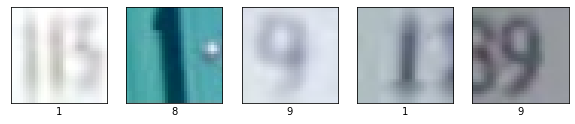

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [14]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1400)              4302200   
_________________________________________________________________
dense_5 (Dense)              (None, 600)               840600    
_________________________________________________________________
dense_6 (Dense)              (None, 40)                24040     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                410       
Total params: 5,167,250
Trainable params: 5,167,250
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.290637  0.273039 

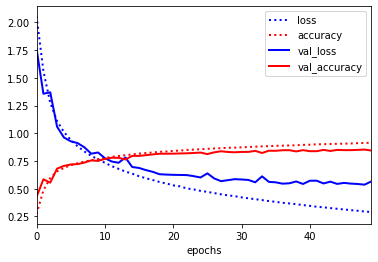

In [15]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_model_1_1():
    # We first create a sequential model
    model = models.Sequential()
    # We add a first input layer
    # Since the data is 32 x 32 RGB, the shape is 32 x 32 x 3 = 3072
    # We flatten this in the first layer to create a model
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))

    # Now we start with the actual weights and such
    model.add(layers.Dense(1400, activation='relu', ))
    model.add(layers.Dense(600, activation='relu', ))
    model.add(layers.Dense(40, activation='relu', ))

    # We of course end with a dense softmax layer, 
    # since we are doing classification. 10 nodes, since we have 10 labels.
    model.add(layers.Dense(10, activation='softmax'))

    # We use rmsprop as optimizer, because this is done in other places too.
    # We of course use categorical crossentropy for categorical data.
    # And we use accuracy as our metric, since that is we are graded on (< 70%).
    model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # We finally return the model
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=64)

answer_q_1_1 = """A good approach was making layers as small as possible with good results, especially for the last layer. Repeating this for > 3 layers did not increase the score. 
We saw adagrad was the best optimiser with 0.01 learning rate, since adaptive optimisers will miss local minima less likely.              
We saw 64 was a good batch size, larger size gave more overfit, smaller gave lower scores.
The performance is good with 85% score and few spikes. There is a slight overfit after 20 epochs."""

print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [16]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1400)              1435000   
_________________________________________________________________
dense_9 (Dense)              (None, 600)               840600    
_________________________________________________________________
dense_10 (Dense)             (None, 40)                24040     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                410       
Total params: 2,300,050
Trainable params: 2,300,050
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.308336  0.271261 

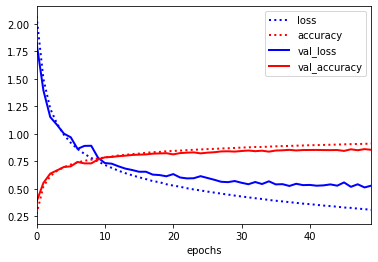

In [17]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
    # We first create a sequential model
    model = models.Sequential()
    # We add a first input layer
    # Since the data is 32 x 32 RGB, the shape is 32 x 32 = 3072
    # We flatten this in the first layer to create a model
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))

    # Now we start with the actual weights and such
    model.add(layers.Dense(1400, activation='relu', ))
    model.add(layers.Dense(600, activation='relu', ))
    model.add(layers.Dense(40, activation='relu', ))

    # We of course end with a dense softmax layer, 
    # since we are doing classification. 10 nodes, since we have 10 labels.
    model.add(layers.Dense(10, activation='softmax'))

    # We use rmsprop as optimizer, because this is done in other places too.
    # We of course use categorical crossentropy for categorical data.
    # And we use accuracy as our metric, since that is we are graded on (< 70%).
    model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # We finally return the model
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=64)
answer_q_1_2 = """We used the model from 1.1, but now with greyscaled images as input.
The only thing that was changed was the input shape. We see that the performance has slightly increased to 86%, but has very similar curves.
Apparently, the colour of the pictures was 'noise' that made it more difficult for the model to distinguish numbers.
Grayscaling removed the colour (and thus the noise), so that it was easier to extract important features,
thereby slightly increasing the performance, although marginally."""

print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_18 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 1400)              1435000   
_________________________________________________________________
dropout_20 (Dropout)         (None, 1400)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 600)               840600    
_________________________________________________________________
dropout_21 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 40)                24040     
_________________________________________________________________
dropout_22 (Dropout)

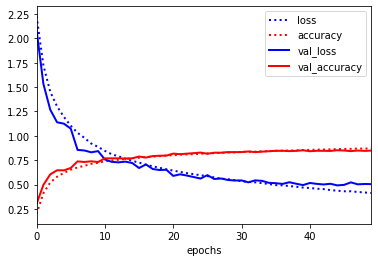

In [18]:
def build_model_1_3():
    # We first create a sequential model
    model = models.Sequential()
    # We add a first input layer
    # Since the data is 32 x 32 Grey, the shape is 32 x 32 = 1024
    # We flatten this in the first layer to create a model
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))

    # Now we start with the actual weights and such
    model.add(layers.Dense(1400, activation='relu', ))
    #model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.075))
    model.add(layers.Dense(600, activation='relu', ))
    #model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.125))
    model.add(layers.Dense(40, activation='relu', ))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())

    # We of course end with a dense softmax layer, 
    # since we are doing classification. 10 nodes, since we have 10 labels.
    model.add(layers.Dense(10, activation='softmax'))

    # We use rmsprop as optimizer, because this is done in other places too.
    # We of course use categorical crossentropy for categorical data.
    # And we use accuracy as our metric, since that is we are graded on (< 70%).
    model.compile(optimizer=optimizers.Adagrad(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # We finally return the model
    return model
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=64)

answer_q_1_3 = """Intensive experimenting unfortunately yielded no improvements in accuracy.
Large dropouts (> 0.3) had significantly worse results, and L1/L2 regularisation had no effect.
Very small increments of dropout and batch normalisation in the last layer proved to be most effective.
We do see that the overfitting has decreased, the red curves agree much more than before, the same for the blue curves."""

print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)    

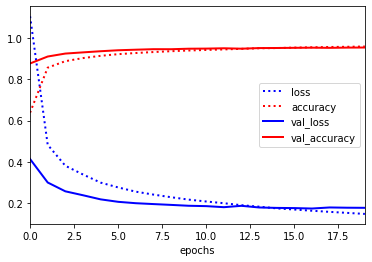

In [19]:
def build_model_2_1():
    model = models.Sequential()

    # Conv Layer 1: We start with 32 and (3, 3).
    # We also normalise the batch after every conv layer, and sometimes do dropouts
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
    model.add(layers.BatchNormalization())

    # Conv Layer 2: We again do 32 and (3, 3), we also do a max pooling
    # And a small dropout
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    # Conv Layer 3: We increase to 64 and (4, 4)
    model.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

    # Conv Layer 4: We again do 64 and (4, 4), now also max pool and dropout
    model.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    # Conv layer 5: We do 128 and (4, 4), again max pool and increased dropout
    model.add(layers.Conv2D(128, (4, 4), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Conv layer 6
    model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    # Stop convolutional, first flatten
    model.add(layers.Flatten())    

    # We now stop with convolutional layers, and start adding dense layers.
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.BatchNormalization())
  
    model.add(layers.Dense(25, activation='relu'))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile
    model.compile(optimizer=optimizers.Adagrad(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=32)

answer_q_2_1 = """We begin by mimicing the VGG-model; 2 blocks of 2 convolutional layers. 
We start with 32 filters and double the amount after a max pool, where we use 2x2 filters of stride length 2.
Increasing the amount of filters allows preservation of the info as the resolution decreases and avoids decreasing the number of activiations.
We improve the VGG-model by adding one 128 and one 256-filter layer with max pooling.
The filter sizes are 3x3 but increase as the number of filters grow. 
We use relu to simplify the training of our model, and regularise with batch normalisation after a layer and gradually larger dropouts so the deeper layers are more regularised.
We end with two small dense relu layers. The model performs well with 95% score and 90% after 2 epochs, with less overfitting and no spikes."""

print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

C:\Users\s165048\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)      

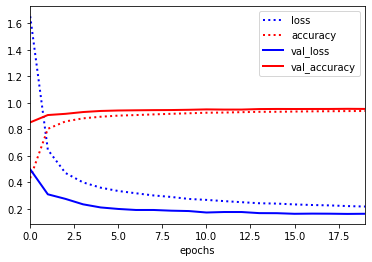

In [20]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zca_whitening=True,
    zoom_range=[1, 1.25])
it_train = train_datagen.flow(rgb2gray(X_train), y_train, batch_size=32)

augmented_split = (it_train, rgb2gray(X_val), y_val)

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               generator=True, train=False, steps_per_epoch = 1986, epochs=20, batch_size=32)

answer_q_2_2 = """Given that our dataset consists of digits we already know that rotations and flipping are not beneficial.
Trying these augmentations indeed result in lower accuracy, since we destroy the important information in the pictures.
Augmentations that do not change the orientation work, small shifts, ZCA and zooming helped a bit.

Accuracy is 2% lower since the pictures are more difficult, but val_accuracy improved with 0.2%.
Since our dataset is large, augmentations are ineffective."""

print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1' (800 words)



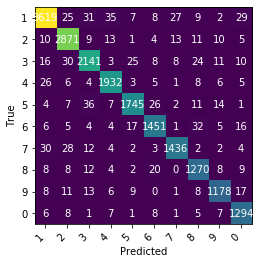

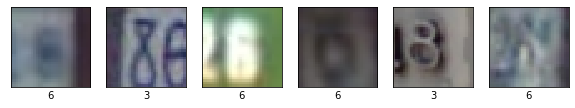

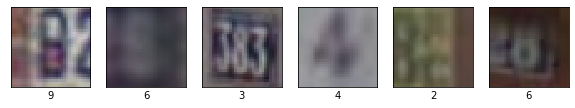

Answer is 798 characters long


In [21]:
from sklearn.metrics import confusion_matrix
import math

# We load the model from file
model_2_2 = load_model_from_file(base_dir, "model_2_2")
# Then we get the predictions of our model
y_pred = model_2_2.predict(rgb2gray(X_test))
# We retrieve all misclassified samples
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
# Then the accuracy is of course 1 -  the ratio of misclassified samples
test_accuracy_3_1 = 1 - len(misclassified_samples)/len(X_test)

# Print for sanity check, comment out when submit
# print(test_accuracy_3_1)

# Plot the confusing matrix
def plot_confusion_matrix(): 
    # The labels of the house data are weird
    # You would think 0, 1, 2, 3 ..., but it is 1, 2, 3, .., 10.
    # Therefore, the confusion matrix starts with 1 and ends with 0.
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]

    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    # True digit value
    ax.set_ylabel('True')
    # Predicted digit value
    ax.set_xlabel('Predicted')
    # Set label x
    ax.set_xticklabels(labels, rotation=45, ha="right")
    # Set label y
    ax.set_yticklabels(labels)
    # Plot each value
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

# Plot confusion matrix
plot_confusion_matrix()

# Plot misclassifications for digit eight
def plot_misclassifications():
    # Save the misclassified pictures of number i in a list
    misclassified_number_8 = list()
    # List to store the predicted label
    y_wrong=list()

    # We loop over all misclassified samples
    for elem in misclassified_samples:
        # We check if the element was indeed misclassified as number i
        # Index is shifted by one due to labelling
        if y_test[elem][8-1] == 1:
            # We append the image to the misclassified numbers
            misclassified_number_8.append(X_test[elem])
            # Append the predicted number to elem
            y_wrong.append(y_pred[elem])

    # Plot all images
    # Amount of pictures per column
    size = 6
    # Amount of columns
    ncols = math.floor(len(misclassified_number_8)/size)
    # For each column
    for j in range(min(ncols, 2)):
        # First picture we plot
        start = size*j
        # Last picture we plot
        end = min(size*j + size, len(misclassified_number_8) - 1)
        # Plot the images of this row
        plot_images(misclassified_number_8[start:end],y_wrong[start:end])  


# Plot misclassifications of digit eight
plot_misclassifications()

answer_q_3_1 = """From the confusion matrix, we see that 1 is most often misclassified, and all digits are often misclassified as a 1, most often the long-lined digits 4 and 7.
1 also occurs often in the data. Pairs that are almost never confused are 7 & 8, 0 & 5, 4 & 7. These have different shapes and thus are easier to tell apart.
We pick 8 since 8 resembles digits 3, 6, 9, and 0.
Plotting the misclassified 8s, we see:
-The picture is unclear, the 8 is not visible.
-Some digits are incorrectly labeled; e.g. a 3 labeled as an 8.
-The model misclassified the digit for no apparent reason. Here the model can improve.
-Other numbers were in the picture that the model focused on. It should have focused more on the center by zooming in.
This shows it is impossible to reach 100%; some are impossible to predict."""

print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

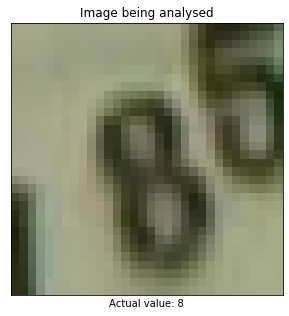

C:\Users\s165048\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


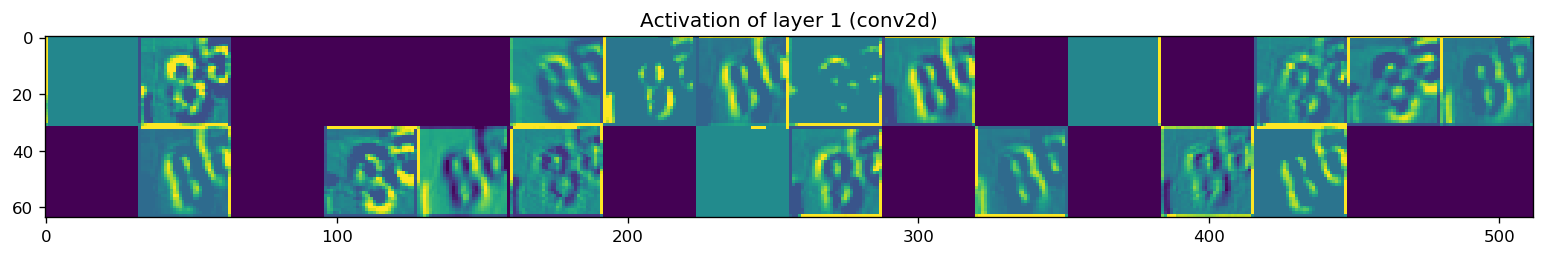

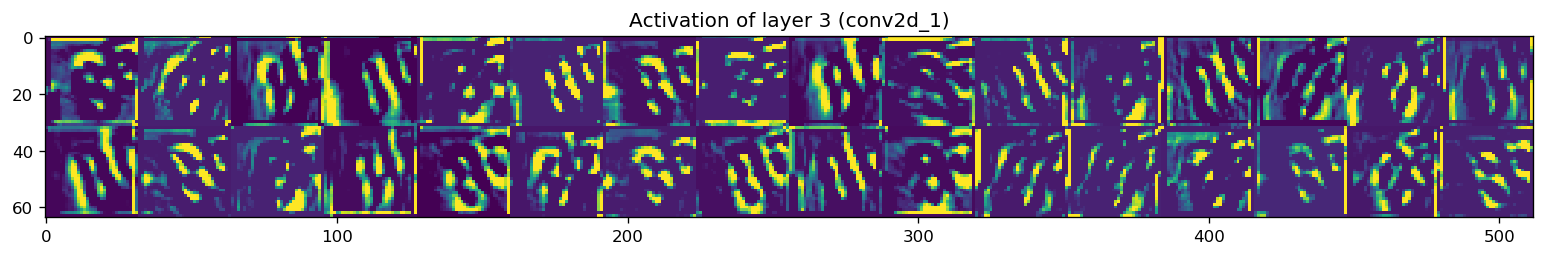

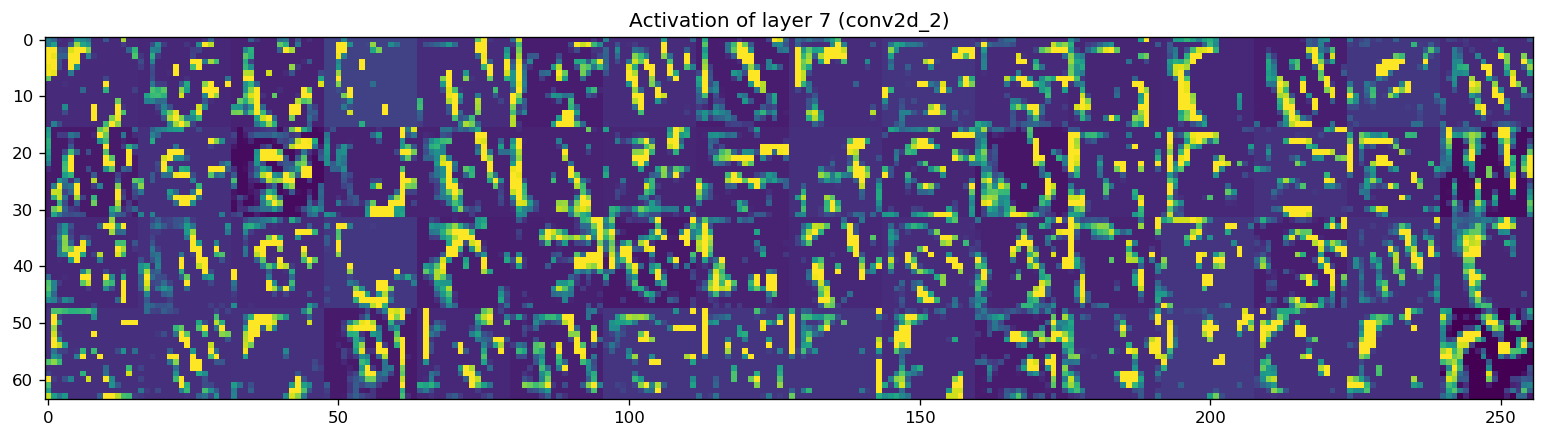

Answer is 496 characters long


In [22]:
from tensorflow.keras import models

# Load 2.2 from file, may take a while
model = load_model_from_file(base_dir, "model_2_2")

# Get the grey variant of the X_test
X_test_gray = rgb2gray(X_test)

# Get the first test element
img_tensor = X_test_gray[0]

# Expand dimensions of this image to get the activations
img_tensor = np.expand_dims(img_tensor, axis=0) 

# Extracts the outputs of all layers:
layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Get the activations of the model based on the first element
activations=activation_model.predict(img_tensor)

# Amount of images that we want to visualise per row
images_per_row = 16

# Names of the layers appended in a nice array
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)

# Plot activations
def plot_activations_layer(layer_index, activations):
    # Start layer
    start = layer_index
    # We only plot one layer, so the end is start + 1
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

# Function for plotting image, since the previous function does not work for one image.
def plot_image(X, y):
    fig, axes = plt.subplots(1, 1,  figsize=(10, 5))
    axes.imshow(X)
    axes.set_xlabel("Actual value: 8")
    axes.set_xticks(()), axes.set_yticks(())
    plt.title("Image being analysed")
    plt.rcParams['figure.dpi'] = 120
    plt.show();

def plot_activations():
    plot_image(X_test[0], 8)

    plot_activations_layer(0, activations)
    plot_activations_layer(2, activations)
    plot_activations_layer(6, activations)

plot_activations()

answer_q_3_2 = """In layer 1, some filters work, whereas others are simply blank.
Some filters focus on vertical lines, some on horizontal lines.
Layer 2 already focuses much more on vertical and horizontal lines, the colour differences are much greater. 
Some filters focus solely on background, some on diagonal, vertical, or horizontal lines.
Layer 3 has low resolution due to maxpooling; we can see more complex shapes, e.g. the curve in 8.
Other layers have such low resolution they do not make sense anymore."""

print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


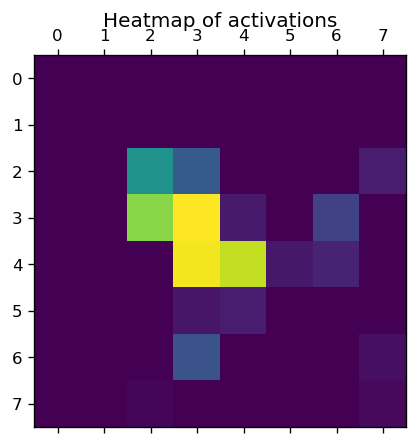

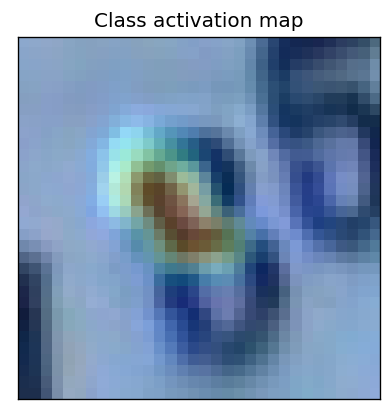

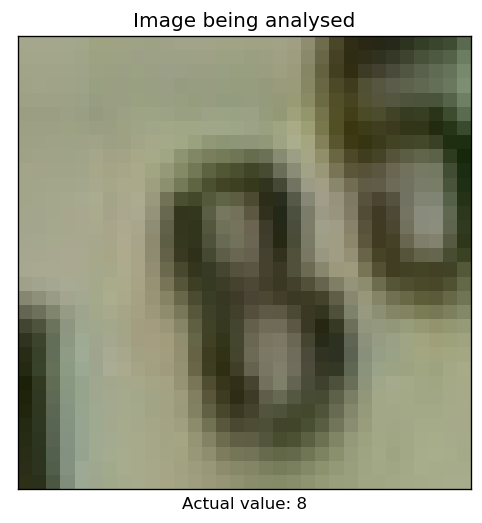

In [23]:
#!pip install opencv-python
from tensorflow.keras import backend as K
tf.compat.v1.disable_eager_execution()
import cv2

def plot_3_3():
    # We first clear the K session
    K.clear_session()
    # We load the model
    model = load_model_from_file(base_dir, "model_2_2")
    
    # We get our image tensor and expand the dimension
    X_test_gray = rgb2gray(X_test)
    img_tensor = X_test_gray[0]
    img_tensor = np.expand_dims(img_tensor, axis=0) 

    # We get the last conv layer and first test example
    last_conv_layer = model.get_layer('conv2d_4')
    
    preds = model.predict(X_test_gray)
    # Sanity check: print(preds[0])
    
    first_test_output = model.output[:, np.argmax(preds[0])]

    # We get the gradient of the first test output
    grads = K.gradients(first_test_output, last_conv_layer.output)[0]
    # We get the pooled gradient
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    # We define this iterator function
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    # We now get the value of the pooled gradients, and the output of the last conv layer on the test example
    pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

    # We get the output value of the convolutional layer by iterating over all elements in the convolutional layer
    for i in range(128):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    plt.matshow(heatmap)
    plt.rcParams['figure.dpi'] = 120
    plt.title("Heatmap of activations")
    plt.show()

    # We now have a 4 x 4 heatmap
    # We want to superimpose it over the image
    cv2.imwrite('3_3_test_example.jpg', np.uint8(255 * X_test[0]))

    # We use cv2 to load the original image
    img = cv2.imread('3_3_test_example.jpg')

    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # 0.4 here is a heatmap intensity factor
    superimposed_img = heatmap * 0.3 + img
    
    cv2.imwrite('3_3.jpg', superimposed_img)

    img2 = cv2.imread('3_3.jpg')
    RGB_im = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    plt.rcParams['figure.dpi'] = 120
    plt.imshow(RGB_im)
    plt.title('Class activation map')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    plot_image(X_test[0], 8)

plot_3_3()


## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________
Loading model from file
Success!
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512) 

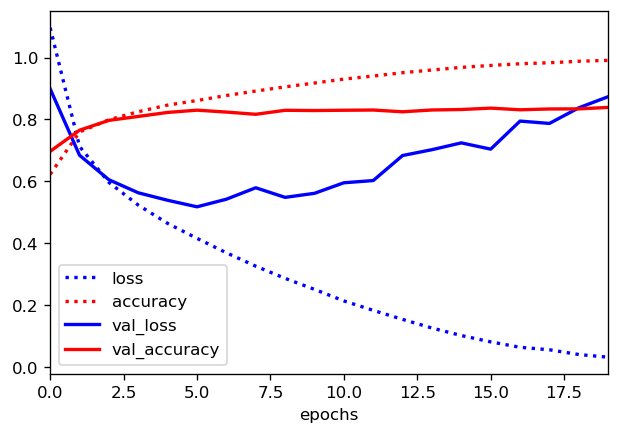

In [24]:
# Import the VGG 26 model
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
    # Get the base model with image net as weight, we do not want the top
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
    
    # Create the model
    model = models.Sequential()
    # Add the VGG 16 base
    model.add(base_model)
    # We need to flatten
    model.add(layers.Flatten())
    # Add our own layers
    model.add(layers.Dense(512, activation='relu'))

    # End with a softmax layer
    model.add(layers.Dense(10, activation='softmax'))
    # We set trainable to true, so that we can freeze certain layers
    base_model.trainable = True

    # Select which layers to unfreeze
    for layer in base_model.layers:
        # We unfreeze the last three layers, freeze the others
        if layer.name == 'block5_conv1' or layer.name == 'block5_conv2' or layer.name == 'block5_conv3':
            layer.trainable = True
        else:
            layer.trainable = False

    # Get a summary
    model.summary()

    # Compile with known optimisers
    model.compile(optimizer=optimizers.Adagrad(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    # Return the model
    return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=32)

answer_q_4_1 = """Freezing all layers yields scores no higher than 0.55. This makes sense as 99% of the parameters are trained on other data.
The more layers we unfreeze, the better the results become, as is logical since a larger percentage of the parameters can now be tweaked. Also, overfitting increases gradually.
ne unfrozen layer yields a 0.65 score, two a 0.76 score. Three layers gets better results with 0.84 val_accuracy, but heavily overfits with 99% accuracy; the model should be regularised."""

print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [25]:
import pickle
import gzip
from sklearn.pipeline import Pipeline

# Preprocessing we tried out
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

# Classifiers we tried out
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = load_model_from_file(base_dir, "model_4_1")

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  # We retrieve trained convolutional part of model_4_1
  new_model = model.layers[0]
  
  # Sanity check: new_model.summary()

  # Run original images through this part
  embed_train = new_model.predict(X_train)
  embed_test = new_model.predict(X_test)
  embed_val = new_model.predict(X_val)

  # Since the shape is a strange (size, 1, 1, 512), we reshape first
  # This is important for feature scaling later on
  embed_train = embed_train.reshape((embed_train.shape[0], 512))
  embed_test = embed_test.reshape((embed_test.shape[0], 512))
  embed_val = embed_val.reshape((embed_val.shape[0], 512))

  # Store embeddings to disk
  store_embedding(embed_train, 'train')
  store_embedding(embed_test, 'test')
  store_embedding(embed_val, 'val')

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  # We think an rbf kernel might be a good idea, in combination with a normaliser
  classifier = SVC(kernel='rbf')
  #classifier = LogisticRegression(max_iter = 500)
  #classifier = RandomForestClassifier(n_estimators = 5000)

  # We create the pipeline
  pipeline = Pipeline([("scaler", StandardScaler()), ("classifier", classifier)])

  # We return the pipeline
  return pipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  # We fit the pipeline
  pipeline.fit(X_train, y_train)

  # We return the accuracy
  return pipeline.score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  # We check if the store embedding files, we unfortunately need to check all three files like this
  if not os.path.isfile(base_dir + '/train_embedding.p') or not os.path.isfile(base_dir + '/test_embedding.p') or not os.path.isfile(base_dir + '/val_embedding.p'):
    # If we miss a file, we store the embeddings
    store_embeddings()   

  # We generate our pipeline
  pipeline = generate_pipeline()
  # We evaluate the embeddings
  scores = evaluate_pipeline(pipeline, load_embedding('train'), np.argmax(y_train, axis=1), load_embedding('test'), np.argmax(y_test, axis=1))
  # We output the score
  return(scores)

answer_q_4_2 = """3 Classifiers (LR, RF, SVM with rbf) were tried with 3 scalers (MinMax, Normaliser, Standard). 
All scored around 0.83 on validation; tuning or changing classifiers had marginal effect. SVC with rbf kernel scored best with 0.842, so my best model (2_1) was not beaten.
Changing model 4_1 showed the score is almost only dependend on model 4_1, since if model 4_1 scored low, important info was already lost when classifier 4_2 takes over.
No model can retrieve that and improve much on model 4_1."""

# We evauluate on our splits
evaluation_4_2(X_train, y_train, X_test, y_test) 

print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 496 characters long
